In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import textwrap

from matplotlib.ticker import MaxNLocator

In [2]:
# Import our data into pandas from CSV
happy_reports = "happines"
happy_reports_df = pd.read_csv(happy_reports)

happy_reports_df

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Avg Happiness Rank
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1.0
1,2016,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1.0
2,2017,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1.0
3,2018,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1.0
4,2019,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019,United Arab Emirates,Middle East and Northern Africa,20,6.901,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743,20.0
96,2017,United Arab Emirates,Middle East and Northern Africa,20,6.901,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743,20.0
97,2018,United Arab Emirates,Middle East and Northern Africa,20,6.901,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743,20.0
98,2016,United Arab Emirates,Middle East and Northern Africa,20,6.901,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743,20.0


In [4]:
# Sort based upon multiple columns
year_happiness_rank_df = happy_reports_df.sort_values(
    by=["Year", "Happiness Rank"], 
    ascending=True
)
year_happiness_rank_df.head(20)

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Avg Happiness Rank
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1.0
5,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2.0
12,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,3.0
15,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,4.0
23,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,5.0
25,2015,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,6.0
33,2015,Netherlands,Western Europe,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,7.0
35,2015,Sweden,Western Europe,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,8.0
41,2015,New Zealand,Australia and New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,9.0
49,2015,Australia,Australia and New Zealand,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,10.0


Text(0.5, 1.0, 'Top 20 Happiest Countries')

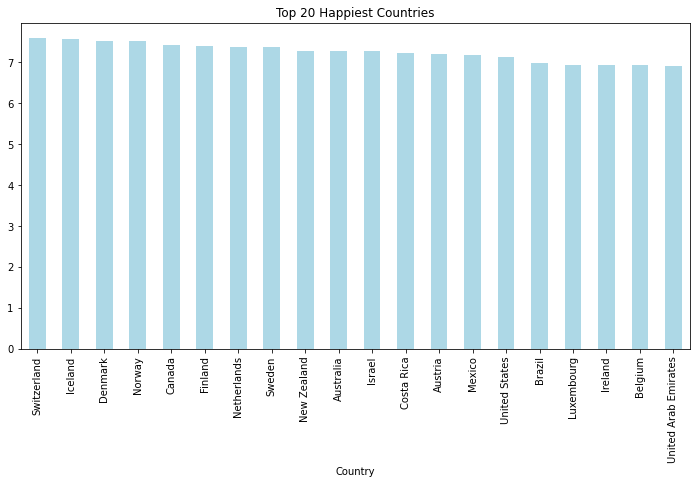

In [6]:
happy_reports_df.groupby('Country')['Happiness Score'].max().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12,6),color='lightblue')
plt.title('Top 20 Happiest Countries')

Text(0.5, 1.0, 'Least Happiest Countries')

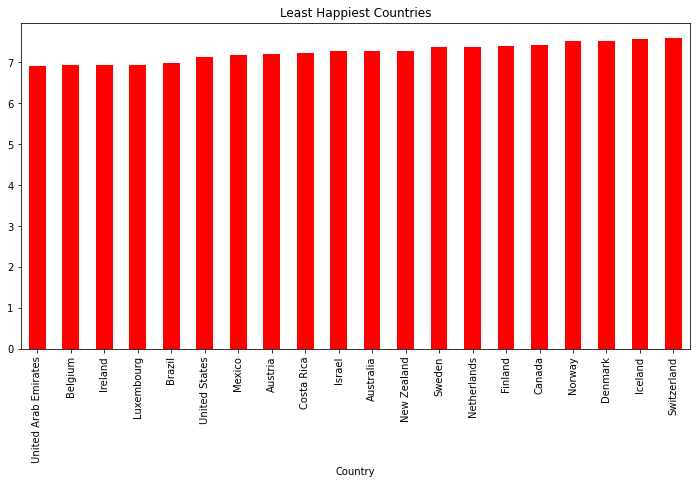

In [7]:
happy_reports_df.groupby('Country')['Happiness Score'].max().sort_values(ascending=True).head(20).plot(kind='bar', figsize=(12,6),color='red')
plt.title('Least Happiest Countries')

Text(0.5, 1.0, 'Top 20 happiest countries')

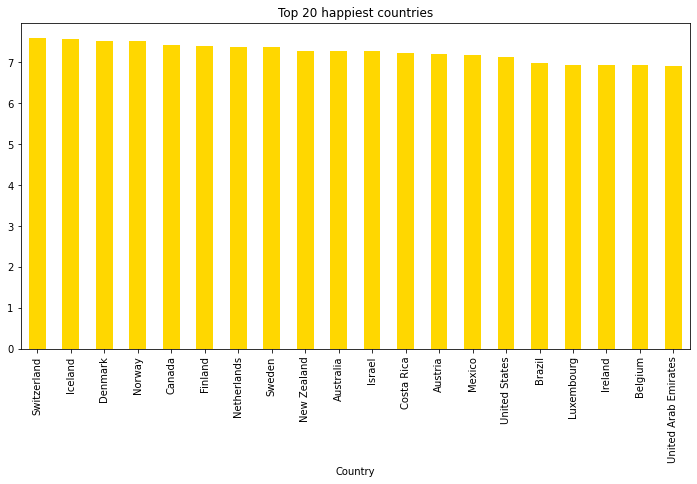

In [9]:
year_happiness_rank_df.groupby('Country')['Happiness Score'].max().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12,6),color='gold')
plt.title('Top 20 happiest countries')

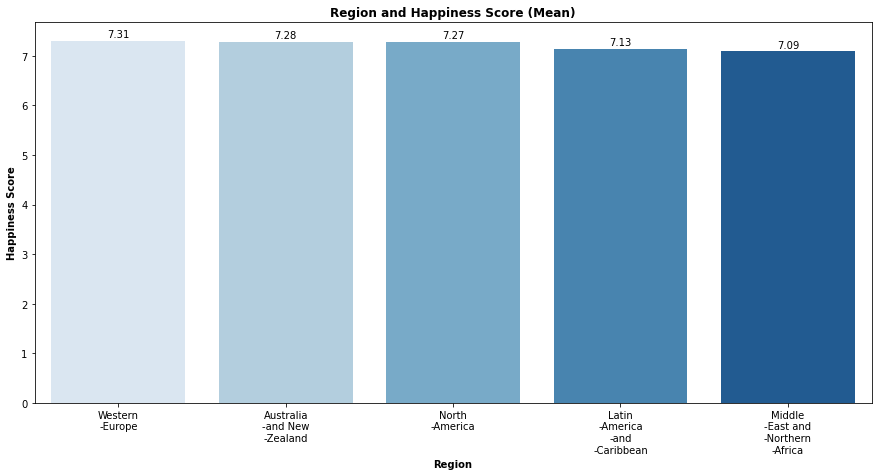

In [10]:
region_mean = happy_reports_df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
plot = sns.barplot(x=region_mean.index, y=region_mean, ax=ax, palette=sns.color_palette("Blues", len(region_mean)))
i = 0
for index, row in region_mean.iteritems():
    plot.text(x=i, y=row*1.01, s=round(row, 2), 
            ha='center', color='black')
    i += 1

ax.set_title('Region and Happiness Score (Mean)', fontdict={'fontweight':'bold'})
ax.set_xlabel('Region', fontweight='bold')
ax.set_ylabel('Happiness Score', fontweight='bold')
ax.set_xticklabels(textwrap.fill(x.get_text(), 10, subsequent_indent='-') for x in ax.get_xticklabels())
plt.show()

In [11]:
# Gloabal changes of happiness factors over the years 
columns = ['Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
year_mean = happy_reports_df.groupby(by=['Year'])[columns].mean()
year_mean

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Year,,,,,,
2015,1.294879,1.271807,0.882275,0.605179,0.29446,0.334683
2016,1.294879,1.271807,0.882275,0.605179,0.29446,0.334683
2017,1.294879,1.271807,0.882275,0.605179,0.29446,0.334683
2018,1.294879,1.271807,0.882275,0.605179,0.29446,0.334683
2019,1.294879,1.271807,0.882275,0.605179,0.29446,0.334683


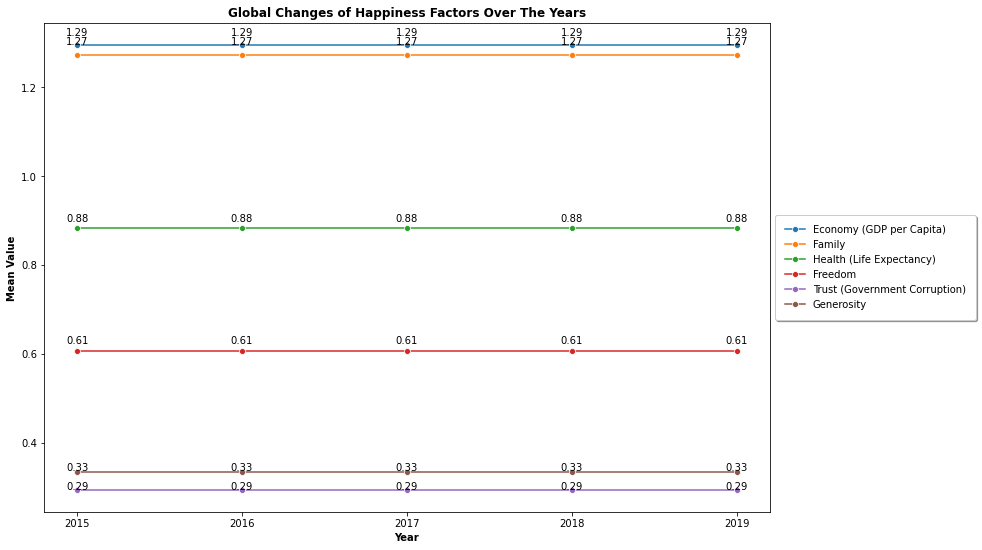

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(13, 9))
for column in columns:
    plot = sns.lineplot(x=year_mean.index, y=year_mean[column], ax=ax, 
               label=column, marker='o')

    for index, value in year_mean[column].iteritems():
        plot.text(x=index, y=round(value, 2)*1.02, s=round(value, 2), 
                  ha='center', color='black')

ax.set_title('Global Changes of Happiness Factors Over The Years', fontweight='bold')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Mean Value', fontweight='bold')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, 
          loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(False)
plt.show()